## Import des librairies

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Display
from IPython.core.display import HTML
from IPython.display import display

sns.set_theme(style="white", rc={
        "axes.edgecolor": "black",
        "ytick.color":"white",
        'axes.spines.left': False,      
        'axes.spines.right': False,
        'axes.spines.top': False})

<h2>Création de la classe de viz</h2>

In [26]:
class Mushroom_viz():
    
    def __init__(self,df, target):
         #--------------------------------------------------------
        """ • Initialise with Data_ml
            • Params = df, target
            • Return None """
        #---------------------------------------------------------
        self.df = df
        self.target = target
        
    
    def data_head(self):
        #---------------------------------------------------------
        """ • Shows 5 first lines of Dataset
            • Return dataset """
        #---------------------------------------------------------       
        return self.df.head()
    
    
    def data_shape(self):
        #---------------------------------------------------------
        """ • Shows basics infos from dataset
            • Return string """
        #---------------------------------------------------------
        string = [f"Nombre de lignes : {self.df.shape[0]} lignes",
        f"Nombre de colonnes : {self.df.shape[1]} colonnes",
        f"Nombre total de celulles non nulles : {self.df.notna().sum().sum()}",
        f"Nombre total de cellules nulles : {self.df.isna().sum().sum()}"]
        
        return string
    
    def data_sample(self):
        #---------------------------------------------------------
        """ • Shows samples of features from dataset
            • Return dataset """
        #---------------------------------------------------------
        samples = []
        for i in self.df.columns:
            samples.append(str(list(self.df[i].head(5))))

        obs = pd.DataFrame({
            'name' : self.df.columns,
            'type':self.df.dtypes,
            'sample':samples,
            '% nulls':round((self.df.isnull().sum()/len(self.df))*100)   
            })

        return obs
        
    
    def infos(self):
        #---------------------------------------------------------
        """ • Shows infos on self.df(lines, columns, nulls) 
            and make sample of features
            • Return dataset """
        #---------------------------------------------------------             
        print('')
        display(HTML('<h2>INFOS DATASET</h2>'))
        
        display(HTML('<h3>Head dataset</h3>'))
        display(self.data_head())
        
        display(HTML('<h3>Shape dataset</h3>'))
        display(self.data_shape())

        display(HTML('<h3>Sample dataset</h3>'))
        display(self.data_sample())   
    
    
    def look(self, target):
        #---------------------------------------------------------
        """ • Shows infos on self.df(lines, columns, nulls) 
            and make sample of features
            • Return dataset """
        #---------------------------------------------------------       
        display(HTML(f'<h3>Analysis of feature : "{target}"</h3>'))
        display(self.df[target].describe())
        
        fig, ax = plt.subplots(figsize=(8,6))
        plot = sns.histplot(data=self.df, x=target, shrink=.8, ax=ax)
        ax.set_title(f'Distribution of {target}', size=20, weight='bold')
        ax.bar_label(ax.containers[0])
        return fig
        
    
    def korr(self, target):
        #---------------------------------------------------------
        """ • Shows infos correlation between numeric targets
            • Return plot """
        #---------------------------------------------------------            
        temp_df = self.df.copy()
        
        if target in list(self.df.select_dtypes(exclude=[np.number]).columns):

            listing = temp_df[target].unique()
            replacing = list(range(1, len(listing)+1))
            temp_df[target] = temp_df[target].replace(listing,replacing)
            
            df_corr = temp_df.corr()
        else:
            df_corr = self.df.corr()
                    
        corr_target = df_corr.sort_values(target, ascending=False)
        
        fig, ax = plt.subplots(figsize=(8,6))
        plot = sns.barplot(x=corr_target[target], y=corr_target.index, ax=ax)
        fig.suptitle(f'Correlation des features vis à vis de {target}')
        return fig

    
    def kompare(self, x, y):
        #---------------------------------------------------------
        """ • Scatterplot with regression line between numeric targets
            • Return plot """
        #---------------------------------------------------------    
        
        new_df = self.df.copy()
        
        if (x in list(self.df.select_dtypes(exclude=[np.number]).columns)):
            listing = new_df[x].unique()
            replacing = list(range(1, len(listing)+1))
            new_df[x] = new_df[x].replace(listing,replacing)
            
        if (y in list(self.df.select_dtypes(exclude=[np.number]).columns)):
            listing = new_df[y].unique()
            replacing = list(range(1, len(listing)+1))
            new_df[y] = new_df[y].replace(listing,replacing)
        
        fig, ax = plt.subplots(figsize=(8,6))
        #plot = sns.lmplot(x=x, y=y, data=new_df, height=5, aspect=2)
        plot = sns.regplot(x=x, y=y, data=new_df, ax=ax)
        fig.suptitle(f'Comparaison de {x} en fonction de {y}');
        return fig
    
    def focus(self, feature):
        #---------------------------------------------------------
        """ • analyses feature
            • Return text """
        #---------------------------------------------------------    
        
        return self.df[feature].value_counts()

## Création de l'objet viz en associant la target class

In [27]:
df = pd.read_csv('mushrooms.csv')
mushroom = Mushroom_viz(df, 'class')

## Visualiser les infos de bases

In [28]:
mushroom.infos()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


['Nombre de lignes : 8124 lignes',
 'Nombre de colonnes : 23 colonnes',
 'Nombre total de celulles non nulles : 186852',
 'Nombre total de cellules nulles : 0']

,name,type,sample,% nulls
class,class,object,"['p', 'e', 'e', 'p', 'e']",0.0
cap-shape,cap-shape,object,"['x', 'x', 'b', 'x', 'x']",0.0
cap-surface,cap-surface,object,"['s', 's', 's', 'y', 's']",0.0
cap-color,cap-color,object,"['n', 'y', 'w', 'w', 'g']",0.0
bruises,bruises,object,"['t', 't', 't', 't', 'f']",0.0
odor,odor,object,"['p', 'a', 'l', 'p', 'n']",0.0
gill-attachment,gill-attachment,object,"['f', 'f', 'f', 'f', 'f']",0.0
gill-spacing,gill-spacing,object,"['c', 'c', 'c', 'c', 'w']",0.0
gill-size,gill-size,object,"['n', 'b', 'b', 'n', 'b']",0.0
gill-color,gill-color,object,"['k', 'k', 'n', 'n', 'k']",0.0


* Absence de cellules non vides pas 

## FOCUS FEATURES :

In [29]:
#TARGET : CLASS

In [30]:
mushroom.focus('class')

e    4208
p    3916
Name: class, dtype: int64

In [31]:
mushroom.df['class'].describe()

count     8124
unique       2
top          e
freq      4208
Name: class, dtype: object

In [32]:
class_dict = {'e': 'edible', 'p': 'poisoned'}
cap_shape_dict = {'b' : 'bell', 'c' : 'conical', 'x':'convex', 'f':'flat', 'k' : 'knobbed', 's' : 'sunken'}
cap_surface_dict = {'f' : 'fibrous', 'g' : 'grooves', 'y' : 'scaly', 's' : 'smooth'}
cap_color_dict = {'n' : 'brown', 'b' : 'buff', 'c' : 'cinnamon', 'g' : 'gray', 'r' : 'green', 'p' : 'pink', 'u' : 'purple', 'e' : 'red', 'w' : 'white', 'y' : 'yellow'}
bruises_dict = { 't' : 'bruises', 'f' : 'no' }
odor_dict = {'a' : 'almond', 'l' : 'anise', 'c' : 'creosote', 'y' : 'fishy', 'f' : 'foul', 'm' : 'musty', 'n' : 'none', 'p' : 'pungent', 's' : 'spicy'} 
gill_attachment_dict = {'a' : 'attached', 'd' : 'descending', 'f' : 'free', 'n' : 'notched'}
gill_spacing_dict = {'c' : 'close', 'w' : 'crowded', 'd' : 'distant'}
gill_size_dict = {'b' : 'broad', 'n' : 'narrow'}
gill_color_dict = { 'k' :'black', 'n' : 'brown', 'b' : 'buff', 'h' : 'chocolate', 'g' : 'gray', 'r' : 'green', 'o' : 'orange', 'p' : 'pink', 'u' : 'purple', 'e' : 'red', 'w' : 'white', 'y' : 'yellow'}
stalk_shape_dict = {'e' : 'enlarging', 't' : 'tapering'}
stalk_root_dict = {'b' : 'bulbous', 'c' : 'club', 'u' : 'cup', 'e' : 'equal', 'z' : 'rhizomorphs', 'r' : 'rooted', '?' : 'missing'}
stalk_surface_above_ring_dict = {'f' : 'fibrous', 'y' : 'scaly', 'k' : 'silky', 's' : 'smooth'}
stalk_surface_below_ring_dict = { 'f' : 'fibrous', 'y' : 'scaly', 'k' : 'silky', 's' : 'smooth'}
stalk_color_above_ring_dict = {'n' : 'brown', 'b' : 'buff', 'c' : 'cinnamon', 'g' : 'gray', 'o' : 'orange', 'p' : 'pink','e' : 'red', 'w' : 'white', 'y' : 'yellow'}
stalk_color_below_ring_dict = {'n' : 'brown', 'b' : 'buff', 'c' : 'cinnamon', 'g' : 'gray', 'o' : 'orange', 'p' : 'pink','e' : 'red', 'w' : 'white', 'y' : 'yellow'}
veil_type_dict = {'p' : 'partial', 'u' : 'universal'}
veil_color_dict = {'n' : 'brown', 'o' : 'orange', 'w' : 'white', 'y' : 'yellow'}
ring_number_dict = {'n' : 'none', 'o' : 'one', 't' :'two'}
ring_type_dict = {'c' : 'cobwebby', 'e' : 'evanescent', 'f' : 'flaring', 'l' : 'large', 'n' :'none', 'p' : 'pendant', 's' : 'sheathing', 'z' : 'zone'}
spore_print_color_dict = {'k' :'black', 'n' : 'brown', 'b' :'buff', 'h' : 'chocolate', 'r' : 'green', 'o' : 'orange', 'u' : 'purple', 'w' :'white', 'y' : 'yellow'}
population_dict = {'a' : 'abundant', 'c' : 'clustered', 'n' : 'numerous', 's' : 'scattered', 'v' : 'several', 'y' : 'solitary'}
habitat_dict = {'g' : 'grasses', 'l' : 'leaves', 'm' : 'meadows', 'p' : 'paths', 'u' : 'urban', 'w' : 'waste', 'd' : 'woods'}

mushroom.df['class'] = mushroom.df['class'].map(class_dict)
mushroom.df['cap-shape'] = mushroom.df['cap-shape'].map(cap_shape_dict)
mushroom.df['cap-surface'] = mushroom.df['cap-surface'].map(cap_surface_dict)
mushroom.df['cap-color'] = mushroom.df['cap-color'].map(cap_color_dict)
mushroom.df['bruises'] = mushroom.df['bruises'].map(bruises_dict)
mushroom.df['odor'] = mushroom.df['odor'].map(odor_dict)
mushroom.df['gill-attachment'] = mushroom.df['gill-attachment'].map(gill_attachment_dict)
mushroom.df['gill-spacing'] = mushroom.df['gill-spacing'].map(gill_spacing_dict)
mushroom.df['gill-size'] = mushroom.df['gill-size'].map(gill_size_dict)
mushroom.df['gill-color'] = mushroom.df['gill-color'].map(gill_color_dict)
mushroom.df['stalk-shape'] = mushroom.df['stalk-shape'].map(stalk_shape_dict)
mushroom.df['stalk-root'] = mushroom.df['stalk-root'].map(stalk_root_dict)
mushroom.df['stalk-surface-above-ring'] = mushroom.df['stalk-surface-above-ring'].map(stalk_surface_above_ring_dict)
mushroom.df['stalk-surface-below-ring'] = mushroom.df['stalk-surface-below-ring'].map(stalk_surface_below_ring_dict)
mushroom.df['stalk-color-above-ring'] = mushroom.df['stalk-color-above-ring'].map(stalk_color_above_ring_dict)
mushroom.df['stalk-color-below-ring'] = mushroom.df['stalk-color-below-ring'].map(stalk_color_below_ring_dict)
mushroom.df['veil-type'] = mushroom.df['veil-type'].map(veil_type_dict)
mushroom.df['veil-color'] = mushroom.df['veil-color'].map(veil_color_dict)
mushroom.df['ring-number'] = mushroom.df['ring-number'].map(ring_number_dict)
mushroom.df['ring-type'] = mushroom.df['ring-type'].map(ring_type_dict)
mushroom.df['spore-print-color'] = mushroom.df['spore-print-color'].map(spore_print_color_dict)
mushroom.df['population'] = mushroom.df['population'].map(population_dict)
mushroom.df['habitat'] = mushroom.df['habitat'].map(habitat_dict)

In [33]:
#Visualise le dataset
mushroom.data_head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,poisoned,convex,smooth,brown,bruises,pungent,free,close,narrow,black,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
1,edible,convex,smooth,yellow,bruises,almond,free,close,broad,black,...,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses
2,edible,bell,smooth,white,bruises,anise,free,close,broad,brown,...,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows
3,poisoned,convex,scaly,white,bruises,pungent,free,close,narrow,brown,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
4,edible,convex,smooth,gray,no,none,free,crowded,broad,black,...,smooth,white,white,partial,white,one,evanescent,brown,abundant,grasses


In [34]:
mushroom.data_shape()

['Nombre de lignes : 8124 lignes',
 'Nombre de colonnes : 23 colonnes',
 'Nombre total de celulles non nulles : 186852',
 'Nombre total de cellules nulles : 0']

In [35]:
mushroom.data_sample()

,name,type,sample,% nulls
class,class,object,"['poisoned', 'edible', 'edible', 'poisoned', '...",0.0
cap-shape,cap-shape,object,"['convex', 'convex', 'bell', 'convex', 'convex']",0.0
cap-surface,cap-surface,object,"['smooth', 'smooth', 'smooth', 'scaly', 'smooth']",0.0
cap-color,cap-color,object,"['brown', 'yellow', 'white', 'white', 'gray']",0.0
bruises,bruises,object,"['bruises', 'bruises', 'bruises', 'bruises', '...",0.0
odor,odor,object,"['pungent', 'almond', 'anise', 'pungent', 'none']",0.0
gill-attachment,gill-attachment,object,"['free', 'free', 'free', 'free', 'free']",0.0
gill-spacing,gill-spacing,object,"['close', 'close', 'close', 'close', 'crowded']",0.0
gill-size,gill-size,object,"['narrow', 'broad', 'broad', 'narrow', 'broad']",0.0
gill-color,gill-color,object,"['black', 'black', 'brown', 'brown', 'black']",0.0


In [36]:
mushroom.df['class']

0       poisoned
1         edible
2         edible
3       poisoned
4         edible
          ...   
8119      edible
8120      edible
8121      edible
8122    poisoned
8123      edible
Name: class, Length: 8124, dtype: object

In [37]:
mushroom.data_sample()

,name,type,sample,% nulls
class,class,object,"['poisoned', 'edible', 'edible', 'poisoned', '...",0.0
cap-shape,cap-shape,object,"['convex', 'convex', 'bell', 'convex', 'convex']",0.0
cap-surface,cap-surface,object,"['smooth', 'smooth', 'smooth', 'scaly', 'smooth']",0.0
cap-color,cap-color,object,"['brown', 'yellow', 'white', 'white', 'gray']",0.0
bruises,bruises,object,"['bruises', 'bruises', 'bruises', 'bruises', '...",0.0
odor,odor,object,"['pungent', 'almond', 'anise', 'pungent', 'none']",0.0
gill-attachment,gill-attachment,object,"['free', 'free', 'free', 'free', 'free']",0.0
gill-spacing,gill-spacing,object,"['close', 'close', 'close', 'close', 'crowded']",0.0
gill-size,gill-size,object,"['narrow', 'broad', 'broad', 'narrow', 'broad']",0.0
gill-color,gill-color,object,"['black', 'black', 'brown', 'brown', 'black']",0.0


count       8124
unique         2
top       edible
freq        4208
Name: class, dtype: object

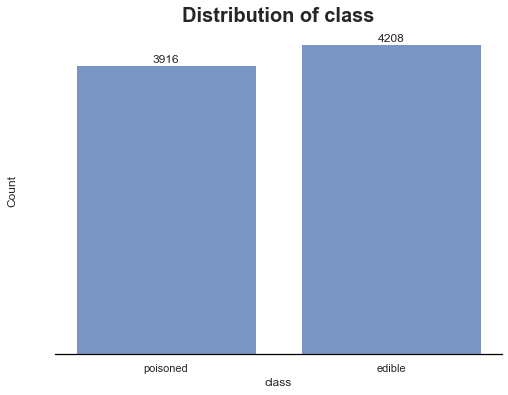

In [38]:
b = mushroom.look(mushroom.target)

count       8124
unique         2
top       edible
freq        4208
Name: class, dtype: object

count       8124
unique         6
top       convex
freq        3656
Name: cap-shape, dtype: object

count      8124
unique        4
top       scaly
freq       3244
Name: cap-surface, dtype: object

count      8124
unique       10
top       brown
freq       2284
Name: cap-color, dtype: object

count     8124
unique       2
top         no
freq      4748
Name: bruises, dtype: object

count     8124
unique       9
top       none
freq      3528
Name: odor, dtype: object

count     8124
unique       2
top       free
freq      7914
Name: gill-attachment, dtype: object

count      8124
unique        2
top       close
freq       6812
Name: gill-spacing, dtype: object

count      8124
unique        2
top       broad
freq       5612
Name: gill-size, dtype: object

count     8124
unique      12
top       buff
freq      1728
Name: gill-color, dtype: object

count         8124
unique           2
top       tapering
freq          4608
Name: stalk-shape, dtype: object

count        8124
unique          5
top       bulbous
freq         3776
Name: stalk-root, dtype: object

count       8124
unique         4
top       smooth
freq        5176
Name: stalk-surface-above-ring, dtype: object

count       8124
unique         4
top       smooth
freq        4936
Name: stalk-surface-below-ring, dtype: object

count      8124
unique        9
top       white
freq       4464
Name: stalk-color-above-ring, dtype: object

count      8124
unique        9
top       white
freq       4384
Name: stalk-color-below-ring, dtype: object

count        8124
unique          1
top       partial
freq         8124
Name: veil-type, dtype: object

count      8124
unique        4
top       white
freq       7924
Name: veil-color, dtype: object

count     8124
unique       3
top        one
freq      7488
Name: ring-number, dtype: object

count        8124
unique          5
top       pendant
freq         3968
Name: ring-type, dtype: object

count      8124
unique        9
top       white
freq       2388
Name: spore-print-color, dtype: object

/var/folders/f7/wyfz6tkx04s_89djz6vy473r0000gn/T/ipykernel_30662/618271484.py:80: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(8,6))


count        8124
unique          6
top       several
freq         4040
Name: population, dtype: object

count      8124
unique        7
top       woods
freq       3148
Name: habitat, dtype: object

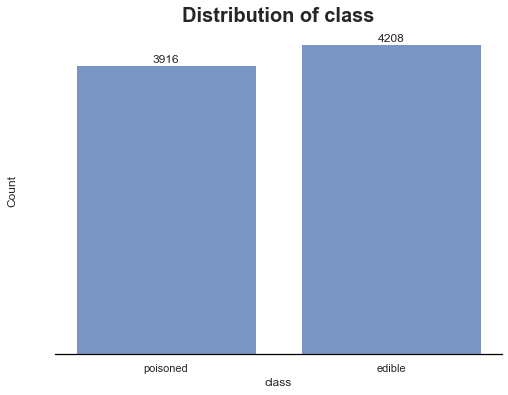

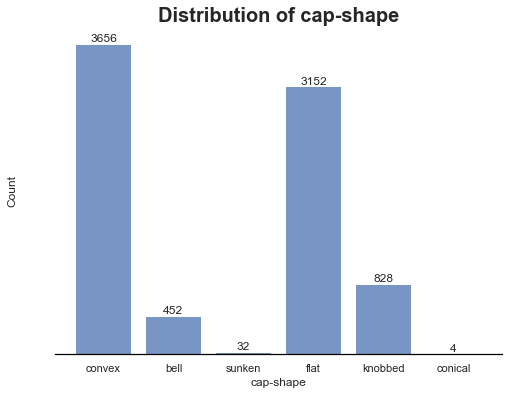

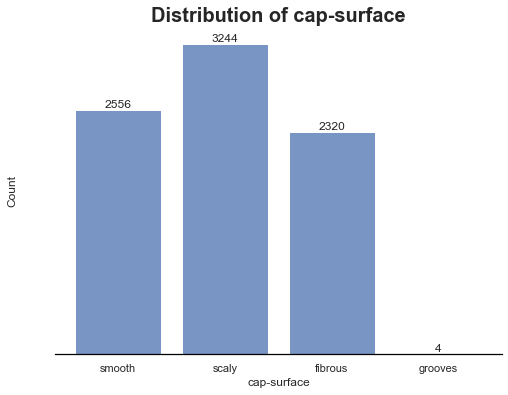

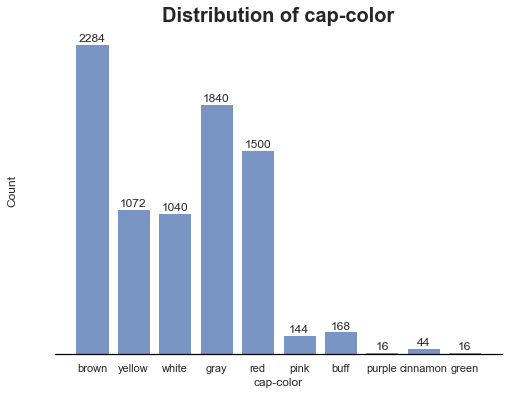

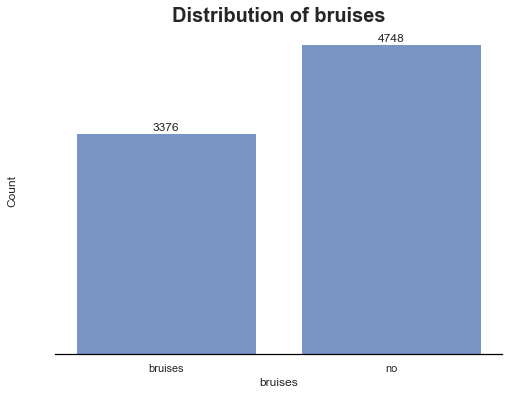

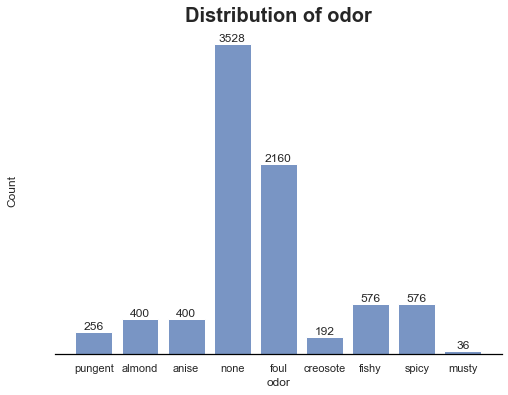

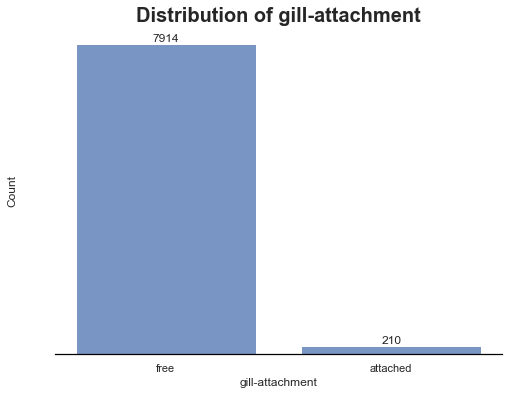

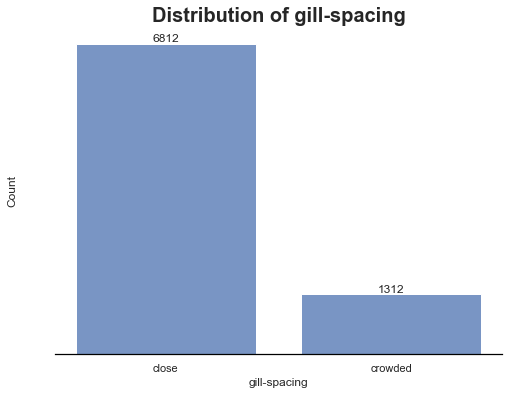

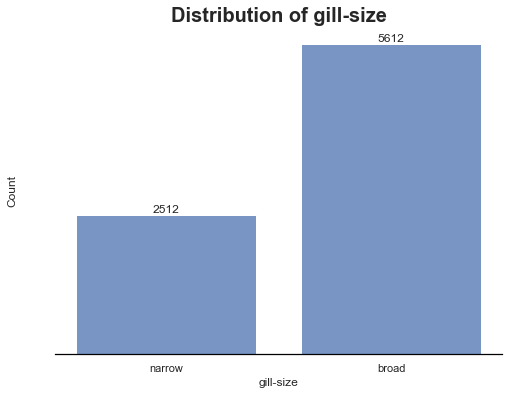

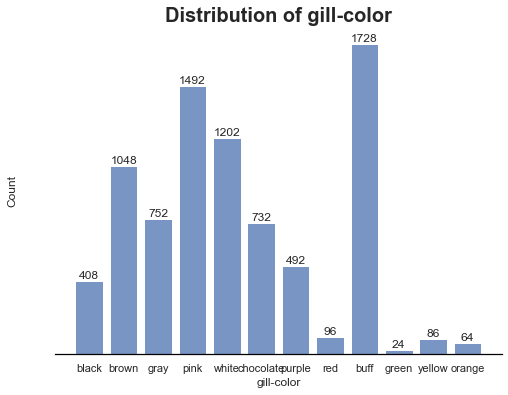

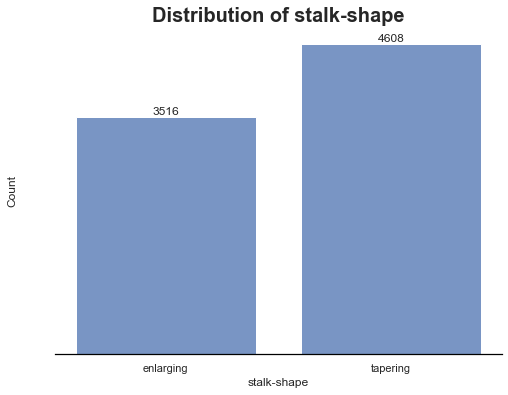

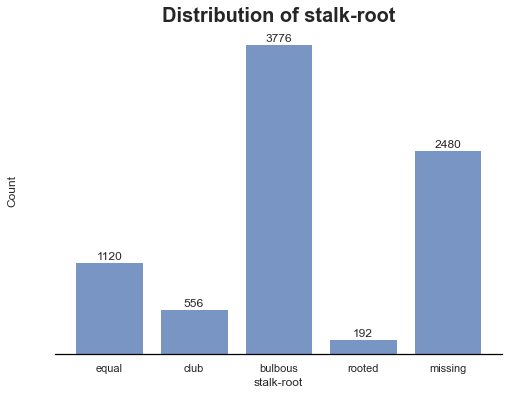

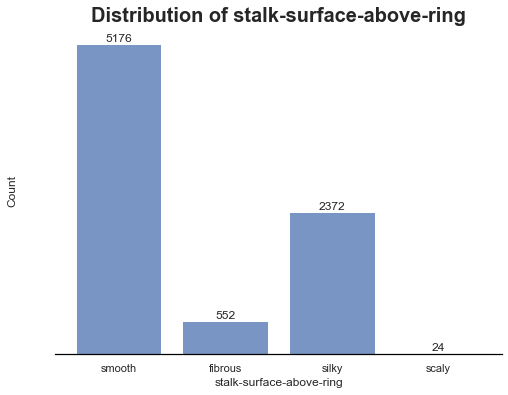

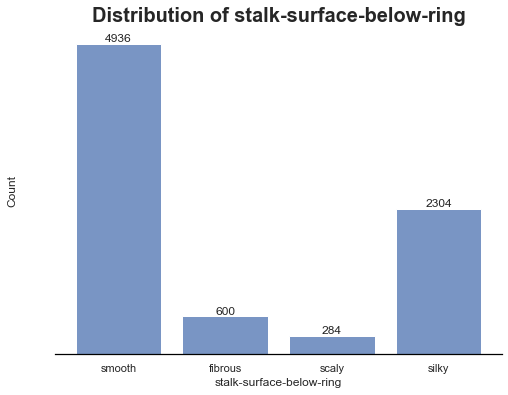

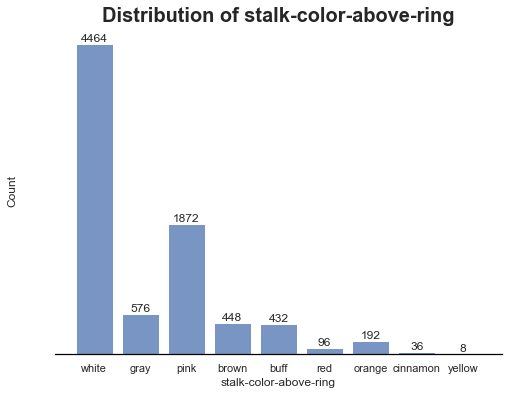

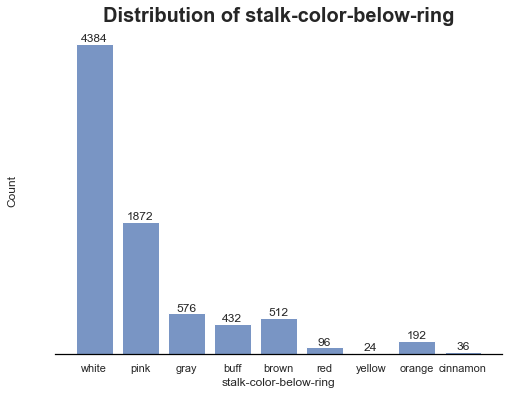

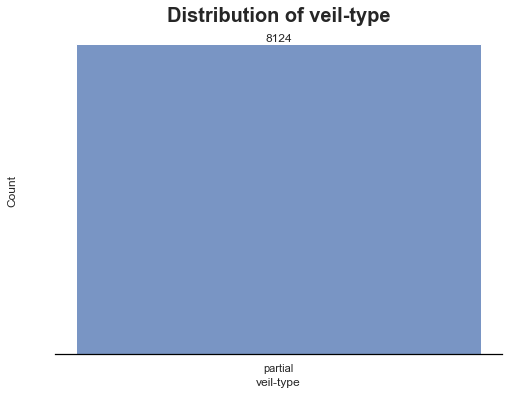

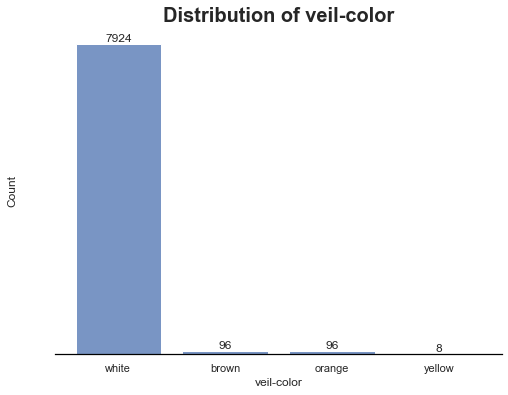

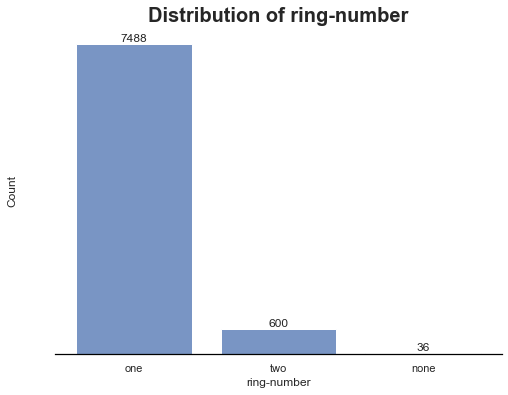

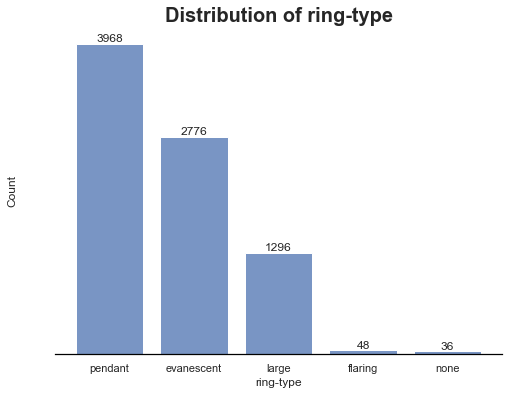

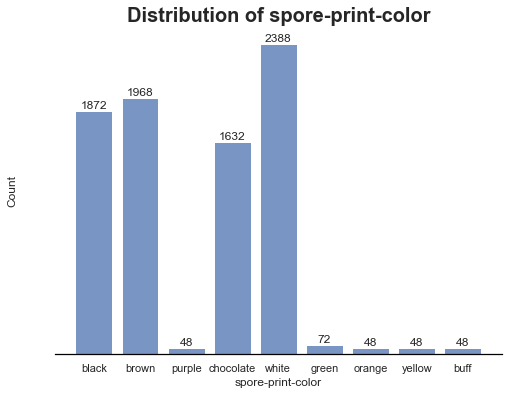

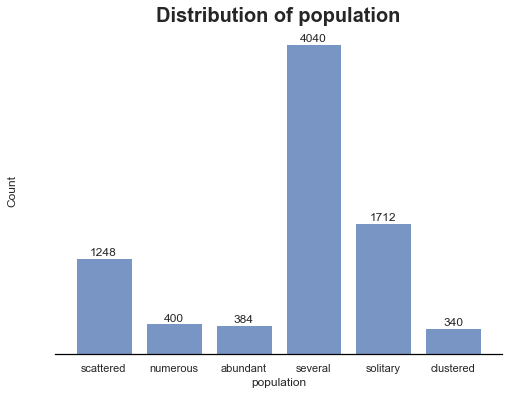

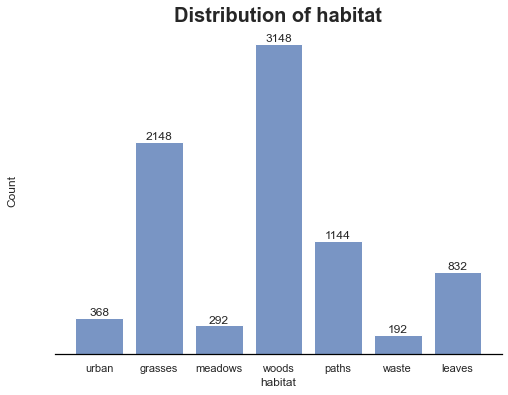

In [39]:
for col in mushroom.df.columns:
    mushroom.look(col)

In [40]:
df = mushroom.df

In [41]:
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,poisoned,convex,smooth,brown,bruises,pungent,free,close,narrow,black,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
1,edible,convex,smooth,yellow,bruises,almond,free,close,broad,black,...,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses
2,edible,bell,smooth,white,bruises,anise,free,close,broad,brown,...,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows
3,poisoned,convex,scaly,white,bruises,pungent,free,close,narrow,brown,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
4,edible,convex,smooth,gray,no,none,free,crowded,broad,black,...,smooth,white,white,partial,white,one,evanescent,brown,abundant,grasses
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,edible,knobbed,smooth,brown,no,none,attached,close,broad,yellow,...,smooth,orange,orange,partial,orange,one,pendant,buff,clustered,leaves
8120,edible,convex,smooth,brown,no,none,attached,close,broad,yellow,...,smooth,orange,orange,partial,brown,one,pendant,buff,several,leaves
8121,edible,flat,smooth,brown,no,none,attached,close,broad,brown,...,smooth,orange,orange,partial,orange,one,pendant,buff,clustered,leaves
8122,poisoned,knobbed,scaly,brown,no,fishy,free,close,narrow,buff,...,silky,white,white,partial,white,one,evanescent,white,several,leaves


In [42]:
#Sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import FunctionTransformer, StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

In [43]:
X = df.drop('class', axis = 1)

In [44]:
y = df['class']


In [45]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, stratify=y)

In [46]:
cat = X.select_dtypes(exclude = [np.number]).columns


In [47]:
# transformer = make_column_transformer((OneHotEncoder(handle_unknown='ignore'), cat))
# send_model = RandomForestClassifier()


In [48]:

# model = make_pipeline(transformer, send_model) 
model = RandomForestClassifier()

In [49]:
model.fit(X_train, y_train)

ValueError: could not convert string to float: 'convex'

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
string = [f'accuracy : {accuracy_score(y_test, y_pred)}',
f'precision : {precision_score(y_test, y_pred, average = None)}',
f'recall : {recall_score(y_test, y_pred, average = None)}',
f'f1 : {f1_score(y_test, y_pred, average = None)}']

In [ ]:
string

In [ ]:
len(y_pred)



In [ ]:
listing = list(y_test.unique())
listing.sort()
fig, ax = plt.subplots(figsize=(8,6))
disp = plot_confusion_matrix(model, X_test, y_test, 
                                display_labels=listing, 
                                cmap=plt.cm.Blues, normalize=None,
                                ax = ax)

fig.suptitle('Decision Tree Confusion matrix, without normalization', fontweight='bold', fontsize=20);

In [1]:
pip freeze


zsh:1: command not found: pip


In [ ]:
y


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, stratify=y)